In [166]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['test_database']
tab = db['test_table']

In [662]:
from pymongo import MongoClient
from bs4 import BeautifulSoup
from collections import Counter

import warnings
import pprint
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib.patches as mpatches
import requests
import json
import re
import unicodedata
import string

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.pipeline import Pipeline

# Democratic Primary 1

In [168]:
dem1_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-las-vegas-nevada'

r_d1 = requests.get(dem1_url)
db_d1 = client.dem1
pages_d1 = db_d1.pages
pages_d1.insert_one({'html': r_d1.content})
soup_d1 = BeautifulSoup(r_d1.content, "html")

div_d1 = soup_d1.find("div", {"class": "wrapper"})
row_d1 = div_d1.find("div", {"class": "row"})
region_d1 = row_d1.find("div", {"class": "region region-content"})
docs_d1 = region_d1.find("div", {"class": "field-docs-content"})

rows = docs_d1.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:8] == 'COOPER: ':
        i['Line'] = i['Line'][8:]
    if i['Line'][:8] == 'CHAFEE: ':
        i['Line'] = i['Line'][8:]
    if i['Line'][:6] == 'WEBB: ':
        i['Line'] = i['Line'][6:]
    if i['Line'][:10] == "O'MALLEY: ":
        i['Line'] = i['Line'][10:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
        
for row in all_rows:
    pages.insert_one(row)
    
rows = pages.find()
dem1 = pd.DataFrame(list(rows))

dem1 = dem1[1:]
dem1 = dem1.drop(['_id', 'html'], axis=1)
dem1 = dem1.dropna()
speakers = [i[:-1].lower() for i in dem1['Speaker']]
dem1['Speaker'] = speakers
dem1 = dem1[-734:]
dem1 = dem1[dem1['Line'] != 'Advertisement']
dem1.index = range(len(dem1))
dem1

# Democratic Primary 2

In [170]:
dem2_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-des-moines-iowa'

r_d2 = requests.get(dem2_url)
db_d2 = client.dem2
pages_d2 = db_d2.pages
pages_d2.insert_one({'html': r_d2.content})
soup_d2 = BeautifulSoup(r_d2.content, "html")

div_d2 = soup_d2.find("div", {"class": "wrapper"})
row_d2 = div_d2.find("div", {"class": "row"})
region_d2 = row_d2.find("div", {"class": "region region-content"})
docs_d2 = region_d2.find("div", {"class": "field-docs-content"})

rows = docs_d2.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:11] == 'DICKERSON: ':
        i['Line'] = i['Line'][11:]
    if i['Line'][:8] == 'CORDES: ':
        i['Line'] = i['Line'][8:]
    if i['Line'][:8] == 'COONEY: ':
        i['Line'] = i['Line'][8:]
    if i['Line'][:10] == "O'MALLEY: ":
        i['Line'] = i['Line'][10:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:12] == 'OBRADOVICH: ':
        i['Line'] = i['Line'][12:]
        
for row in all_rows:
    pages_d2.insert_one(row)
    
rows = pages_d2.find()
dem2 = pd.DataFrame(list(rows))
dem2 = dem2.drop(['_id', 'html'], axis=1)
dem2 = dem2.dropna()
speakers = [i[:-1].lower() for i in dem2['Speaker']]
dem2['Speaker'] = speakers

In [181]:
dem2 = dem2[734:]
dem2 = dem2[dem2['Line'] != '[commercial break]']
dem2.index = range(len(dem2))
dem2

,Speaker,Line
0,dickerson,Before we start the debate here are the rules....
1,dickerson,And when time's up the light turns red. That m...
2,sanders,"Well, John, let me concur with you and with al..."
3,sanders,"Together, leading the world, this country will..."
4,sanders,"I'm running for president, because as I go aro..."
...,...,...
450,clinton,And that's what I will do as your president. I...
451,dickerson,Senator Sanders?
452,sanders,"John -- John, this country today has more inco..."
453,sanders,That's not the America that I think we should ...


# Democratic Primary 3

In [184]:
dem3_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-manchester-new-hampshire'

r_d3 = requests.get(dem3_url)
db_d3 = client.dem3
pages_d3 = db_d3.pages
pages_d3.insert_one({'html': r_d3.content})
soup_d3 = BeautifulSoup(r_d3.content, "html")

div_d3 = soup_d3.find("div", {"class": "wrapper"})
row_d3 = div_d3.find("div", {"class": "row"})
region_d3 = row_d3.find("div", {"class": "region region-content"})
docs_d3 = region_d3.find("div", {"class": "field-docs-content"})

rows = docs_d3.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:6] == 'MUIR: ':
        i['Line'] = i['Line'][6:]
    if i['Line'][:9] == 'RADDATZ: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:10] == "O'MALLEY: ":
        i['Line'] = i['Line'][10:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
        
for row in all_rows:
    pages_d3.insert_one(row)
    
rows = pages_d3.find()
dem3 = pd.DataFrame(list(rows))
dem3 = dem3.drop(['_id', 'html'], axis=1)
dem3 = dem3.dropna()
speakers = [i[:-1].lower() for i in dem3['Speaker']]
dem3['Speaker'] = speakers

In [190]:
dem3.index = range(len(dem3))
dem3

,Speaker,Line
0,raddatz,Good evening to you all. The rules for tonight...
1,muir,We will be tackling many critical issues right...
2,clinton,"Well, thank you. And I'm delighted to be here ..."
3,clinton,"You know, the American president has to both k..."
4,clinton,I'm very clear that we have a distinct differe...
...,...,...
575,clinton,"On January 20th, 2017, the next president of t..."
576,clinton,"Social Security, which Republicans call a Ponz..."
577,clinton,"You know, everybody says every election's impo..."
578,clinton,"You know, I became a grandmother 15 months ago..."


# Democratic Primary 4

In [194]:
dem4_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-charleston-south-carolina'

r_d4 = requests.get(dem4_url)
db_d4 = client.dem4
pages_d4 = db_d4.pages
pages_d4.insert_one({'html': r_d4.content})
soup_d4 = BeautifulSoup(r_d4.content, "html")

div_d4 = soup_d4.find("div", {"class": "wrapper"})
row_d4 = div_d4.find("div", {"class": "row"})
region_d4 = row_d4.find("div", {"class": "region region-content"})
docs_d4 = region_d4.find("div", {"class": "field-docs-content"})

rows = docs_d4.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:6] == 'HOLT: ':
        i['Line'] = i['Line'][6:]
    if i['Line'][:10] == 'MITCHELL: ':
        i['Line'] = i['Line'][10:]
    if i['Line'][:10] == "O'MALLEY: ":
        i['Line'] = i['Line'][10:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
        
for row in all_rows:
    pages_d4.insert_one(row)
    
rows = pages_d4.find()
dem4 = pd.DataFrame(list(rows))
dem4 = dem4.drop(['_id', 'html'], axis=1)
dem4 = dem4.dropna()
speakers = [i[:-1].lower() for i in dem4['Speaker']]
dem4['Speaker'] = speakers

In [196]:
dem4.index = range(len(dem4))
dem4

,Speaker,Line
0,holt,Good evening and welcome to the NBC News Youtu...
1,holt,Tonight will be the final opportunity to see t...
2,holt,"Please welcome Secretary Hillary Clinton, Sena..."
3,holt,"Well, welcome to all of you. Hope you're excit..."
4,holt,This is a critical point in the race. You've b...
...,...,...
533,sanders,"Well, Secretary Clinton was right and what I d..."
534,sanders,"Now, we are a great nation — and we've heard a..."
535,sanders,"We've got to get rid of Super PACs, we've got ..."
536,holt,All right. Well thank you and thanks to all of...


# Democratic Primary 5

In [197]:
dem5_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-durham-new-hampshire'

r_d5 = requests.get(dem5_url)
db_d5 = client.dem5
pages_d5 = db_d5.pages
pages_d5.insert_one({'html': r_d5.content})
soup_d5 = BeautifulSoup(r_d5.content, "html")

div_d5 = soup_d5.find("div", {"class": "wrapper"})
row_d5 = div_d5.find("div", {"class": "row"})
region_d5 = row_d5.find("div", {"class": "region region-content"})
docs_d5 = region_d5.find("div", {"class": "field-docs-content"})

rows = docs_d5.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:6] == 'TODD: ':
        i['Line'] = i['Line'][6:]
    if i['Line'][:8] == 'MADDOW: ':
        i['Line'] = i['Line'][8:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
        
for row in all_rows:
    pages_d5.insert_one(row)
    
rows = pages_d5.find()
dem5 = pd.DataFrame(list(rows))
dem5 = dem5.drop(['_id', 'html'], axis=1)
dem5 = dem5.dropna()
speakers = [i[:-1].lower() for i in dem5['Speaker']]
dem5['Speaker'] = speakers

In [200]:
dem5.index = range(len(dem5))
dem5

,Speaker,Line
0,todd,"Good evening, and welcome to the MSNBC Democra..."
1,maddow,We are super excited to be here at the Univers...
2,todd,And neither party has seen this yet. These can...
3,maddow,And we do hope that the candidates will take t...
4,maddow,We're not here for talking points. We're to le...
...,...,...
468,todd,Our debate coverage—[inaudible] debate coverag...
469,todd,And we want to thank all of you for being here...
470,maddow,"We also want to thank our host, the University..."
471,todd,We'll see you in a few minutes. Thank you.


# Democratic Primary 6

In [203]:
dem6_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-milwaukee-wisconsin'

r_d6 = requests.get(dem6_url)
db_d6 = client.dem6
pages_d6 = db_d6.pages
pages_d6.insert_one({'html': r_d6.content})
soup_d6 = BeautifulSoup(r_d6.content, "html")

div_d6 = soup_d6.find("div", {"class": "wrapper"})
row_d6 = div_d6.find("div", {"class": "row"})
region_d6 = row_d6.find("div", {"class": "region region-content"})
docs_d6 = region_d6.find("div", {"class": "field-docs-content"})

rows = docs_d6.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:7] == 'IFILL: ':
        i['Line'] = i['Line'][7:]
    if i['Line'][:10] == 'WOODRUFF: ':
        i['Line'] = i['Line'][10:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
        
for row in all_rows:
    pages_d6.insert_one(row)
    
rows = pages_d6.find()
dem6 = pd.DataFrame(list(rows))
dem6 = dem6.drop(['_id', 'html'], axis=1)
dem6 = dem6.dropna()
speakers = [i[:-1].lower() for i in dem6['Speaker']]
dem6['Speaker'] = speakers
dem6.index = range(len(dem6))
dem6

,Speaker,Line
0,todd,"TODD: Good evening, and welcome to the MSNBC D..."
1,maddow,MADDOW: We are super excited to be here at the...
2,todd,TODD: And neither party has seen this yet. The...
3,maddow,MADDOW: And we do hope that the candidates wil...
4,maddow,We're not here for talking points. We're to le...
...,...,...
778,ifill,Thank you. Thank you Senator Clinton. Thank yo...
779,woodruff,"And we want to thank our audience, our quiet a..."
780,ifill,I'm going to remain here in Milwaukee tomorrow...
781,woodruff,And I'm going to be returning to Washington. I...


In [264]:
dem6 = dem6[628:]
dem6.index = range(len(dem6))
dem6

,Speaker,Line
0,woodruff,"Good evening, and thank you. We are happy to w..."
1,woodruff,We are especially pleased to thank our partner...
2,ifill,We want to also extend our warm thanks to Milw...
3,woodruff,"Welcome, Senator, great to see you. And former..."
4,clinton,Thank you.
...,...,...
150,ifill,Thank you. Thank you Senator Clinton. Thank yo...
151,woodruff,"And we want to thank our audience, our quiet a..."
152,ifill,I'm going to remain here in Milwaukee tomorrow...
153,woodruff,And I'm going to be returning to Washington. I...


# Democratic Primary 7

In [265]:
dem7_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-flint-michigan'

r_d7 = requests.get(dem7_url)
db_d7 = client.dem7
pages_d7 = db_d7.pages
pages_d7.insert_one({'html': r_d7.content})
soup_d7 = BeautifulSoup(r_d7.content, "html")

div_d7 = soup_d7.find("div", {"class": "wrapper"})
row_d7 = div_d7.find("div", {"class": "row"})
region_d7 = row_d7.find("div", {"class": "region region-content"})
docs_d7 = region_d7.find("div", {"class": "field-docs-content"})

rows = docs_d7.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:7] == 'LEMON: ':
        i['Line'] = i['Line'][7:]
    if i['Line'][:8] == 'COOPER: ':
        i['Line'] = i['Line'][8:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
        
for row in all_rows:
    pages_d7.insert_one(row)
    
rows = pages_d7.find()
dem7 = pd.DataFrame(list(rows))
dem7 = dem7.drop(['_id', 'html'], axis=1)
dem7 = dem7.dropna()
speakers = [i[:-1].lower() for i in dem7['Speaker']]
dem7['Speaker'] = speakers
dem7.index = range(len(dem7))
dem7

,Speaker,Line
0,cooper,And welcome to The Whiting Auditorium on the c...
1,cooper,I'm Anderson Cooper. I want to welcome our vie...
2,cooper,And now we want to welcome the Democratic cand...
3,cooper,Please welcome former Secretary of State Hilla...
4,cooper,"Ladies and gentlemen, the Democratic candidate..."
...,...,...
495,clinton,I don't intend to get into the gutter with who...
496,cooper,I want to thank both the candidates. While we'...
497,cooper,"I want to thank the candidates, the Democratic..."
498,cooper,On Wednesday we'll simulcast the next Democrat...


# Democratic Primary 8

In [282]:
dem8_url = 'https://www.presidency.ucsb.edu/documents/democratic-candidates-debate-miami-florida'

r_d8 = requests.get(dem8_url)
db_d8 = client.dem8
pages_d8 = db_d8.pages
pages_d8.insert_one({'html': r_d8.content})
soup_d8 = BeautifulSoup(r_d8.content, "html")

div_d8 = soup_d8.find("div", {"class": "wrapper"})
row_d8 = div_d8.find("div", {"class": "row"})
region_d8 = row_d8.find("div", {"class": "region region-content"})
docs_d8 = region_d8.find("div", {"class": "field-docs-content"})

rows = docs_d8.find_all('p')[2:]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('strong') != None:
        a = rows[i].find('strong').text
        new_row['Speaker'] = a
    elif rows[i].find('strong') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'][:7] == 'RAMOS: ':
        i['Line'] = i['Line'][7:]
    if i['Line'][:9] == 'SALINAS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'TUMULTY: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'SANDERS: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:9] == 'CLINTON: ':
        i['Line'] = i['Line'][9:]
    if i['Line'][:30] == 'SALINAS [through translator]: ':
        i['Line'] = i['Line'][30:]
    if i['Line'][:28] == 'RAMOS [through translator]: ':
        i['Line'] = i['Line'][28:]
        
for row in all_rows:
    pages_d8.insert_one(row)
    
rows = pages_d8.find()
dem8 = pd.DataFrame(list(rows))
dem8 = dem8.drop(['_id', 'html'], axis=1)
dem8 = dem8.dropna()
speakers = [i[:-1].lower() for i in dem8['Speaker']]
dem8['Speaker'] = speakers
dem8 = dem8[-471:]
dem8.index = range(len(dem8))
dem8

,Speaker,Line
0,salinas [through translator],This will be the first and only debate the can...
1,ramos [through translator],"Here with us tonight is Karen Tumulty, Washing..."
2,salinas,"Welcome, Karen."
3,salinas [through translator],"Now, we're going to welcome the protagonists o..."
4,salinas [through translator],And Senator from Vermont Bernie Sanders. [appl...
...,...,...
466,tumulty,And on behalf of The Washington Post and Univi...
467,ramos [through translator],"We want to use these last moments, it's very i..."
468,ramos [through translator],"So you know it perfectly, who does not vote do..."
469,salinas [through translator],"And as you know, nobody can reach the White Ho..."


# Presidential Debate 1

In [292]:
pres_url = 'https://www.politico.com/story/2016/09/full-transcript-first-2016-presidential-debate-228761'

r_pres = requests.get(pres_url)
db_pres = client.presidente1
pages_pres = db_pres.pages
pages_pres.insert_one({'html': r_pres.content})
soup_pres = BeautifulSoup(r_pres.content, "html")

div = soup_pres.find("div", {"class": "global-wrapper"})
main = div.find("main", {"class": "super-duper"})
article = main.find("article", {"class": "story-main-content"})
text = article.find("div", {"class": "story-text"})

rows = text.find_all('p')[2:-1]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('b') != None:
        a = rows[i].find('b').text
        new_row['Speaker'] = a
    elif rows[i].find('b') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'] == '(APPLAUSE)':
        i['Speaker'] = 'AUDIENCE'
        i['Line'] = 'Applause'
    if i['Line'][:5] == 'HOLT:':
        i['Line'] = i['Line'][5:]
    if i['Line'][:8] == 'CLINTON:':
        i['Line'] = i['Line'][8:]
    if i['Line'][:6] == 'TRUMP:':
        i['Line'] = i['Line'][6:]
        
for row in all_rows:
    pages_pres.insert_one(row)
    
rows = pages_pres.find()
pres1 = pd.DataFrame(list(rows))
pres1 = pres1.drop(['_id', 'html'], axis=1)
pres1 = pres1[1:]

speakers = [i.lower() for i in pres1['Speaker']]
pres1['Speaker'] = speakers
pres1.index = range(len(pres1))

,Speaker,Line
0,holt,Good evening from Hofstra University in Hemps...
1,holt,The participants tonight are Donald Trump and ...
2,holt,Advertisement
3,holt,The 90-minute debate is divided into six segme...
4,holt,The questions are mine and have not been share...
...,...,...
440,holt,"Mr. Trump, very quickly, same question: Will ..."
441,trump,I want to make America great again. We are a ...
442,trump,The other day we were deporting 800 people. An...
443,holt,Will you accept the outcome of the election?


In [293]:
pres1 = pres1[pres1['Line'] != 'Advertisement']
pres1

,Speaker,Line
0,holt,Good evening from Hofstra University in Hemps...
1,holt,The participants tonight are Donald Trump and ...
3,holt,The 90-minute debate is divided into six segme...
4,holt,The questions are mine and have not been share...
5,holt,"I will invite you to applaud, however, at this..."
...,...,...
440,holt,"Mr. Trump, very quickly, same question: Will ..."
441,trump,I want to make America great again. We are a ...
442,trump,The other day we were deporting 800 people. An...
443,holt,Will you accept the outcome of the election?


# Presidential Debate 2

In [296]:
pres2_url = 'https://www.politico.com/story/2016/10/2016-presidential-debate-transcript-229519'
r_pres2 = requests.get(pres2_url)
db_pres = client.president2
pages_pres = db_pres.pages
pages_pres.insert_one({'html': r_pres2.content})
soup_pres = BeautifulSoup(r_pres2.content, "html")

div = soup_pres.find("div", {"class": "global-wrapper"})
main = div.find("main", {"class": "super-duper"})
article = main.find("article", {"class": "story-main-content"})
text = article.find("div", {"class": "story-text"})

rows = text.find_all('p')[2:-1]
all_rows2 = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('b') != None:
        a = rows[i].find('b').text
        new_row['Speaker'] = a
    elif rows[i].find('b') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows2.append(new_row)
    
for i in all_rows2:
    if i['Line'] == '[Applause]':
        i['Speaker'] = 'audience'
        i['Line'] = 'Applause'
    if i['Line'][:8] == 'Raddatz:':
        i['Line'] = i['Line'][8:]
    if i['Line'][:7] == 'Cooper:':
        i['Line'] = i['Line'][7:]
    if i['Line'][:6] == 'Brock:':
        i['Line'] = i['Line'][6:]
    if i['Line'][:8] == 'Clinton:':
        i['Line'] = i['Line'][8:]
    if i['Line'][:6] == 'Trump:':
        i['Line'] = i['Line'][6:]
        
for row in all_rows2:
    pages_pres.insert_one(row)
    
rows = pages_pres.find()
pres2 = pd.DataFrame(list(rows))
pres2 = pres2.drop(['_id', 'html'], axis=1)
pres2 = pres2[2:]

speakers = [i.lower() for i in pres2['Speaker']]
pres2['Speaker'] = speakers
pres2 = pres2[pres2['Line'] != 'Advertisement']
pres2.index = range(len(pres2))

In [297]:
pres2

,Speaker,Line
0,raddatz,Good evening. I'm Martha Raddatz from ABC news.
1,cooper,"And I'm Anderson Cooper from CNN, we want to ..."
2,cooper,Thank you very much for being here. We will b...
3,brock,Thank you and good evening. The last presiden...
4,clinton,"Thank you. Are you a teacher? Yes, I think th..."
...,...,...
201,raddatz,Mr. Trump?
202,trump,"Well, I consider her statement about my child..."
203,raddatz,Thanks to both of you.
204,cooper,I want to thank the university here and this ...


# Presidential Debate 3

In [300]:
pres3_url = 'https://www.politico.com/story/2016/10/full-transcript-third-2016-presidential-debate-230063'
r_pres3 = requests.get(pres3_url)
db_pres = client.presidente3
pages_pres = db_pres.pages
pages_pres.insert_one({'html': r_pres3.content})
soup_pres = BeautifulSoup(r_pres3.content, "html")

div = soup_pres.find("div", {"class": "global-wrapper"})
main = div.find("main", {"class": "super-duper"})
article = main.find("article", {"class": "story-main-content"})
text = article.find("div", {"class": "story-text"})

rows = text.find_all('p')[2:-1]
all_rows = []
empty_row = {
    "Speaker":None, "Line":None
}
for i, row in enumerate(rows):
    new_row = copy.copy(empty_row)
    if rows[i].find('b') != None:
        a = rows[i].find('b').text
        new_row['Speaker'] = a
    elif rows[i].find('b') == None:
        new_row['Speaker'] = a
    new_row['Line'] = rows[i].text
    all_rows.append(new_row)
    
for i in all_rows:
    if i['Line'] == '(Applause)':
        i['Speaker'] = 'AUDIENCE'
        i['Line'] = 'APPLAUSE'
    if i['Line'][:14] == 'Chris Wallace:':
        i['Line'] = i['Line'][14:]
    if i['Line'][:8] == 'Wallace:':
        i['Line'] = i['Line'][8:]
    if i['Line'][:7] == 'Cooper:':
        i['Line'] = i['Line'][7:]
    if i['Line'][:6] == 'Brock:':
        i['Line'] = i['Line'][6:]
    if i['Line'][:8] == 'Clinton:':
        i['Line'] = i['Line'][8:]
    if i['Line'][:6] == 'Trump:':
        i['Line'] = i['Line'][6:]
        
for row in all_rows:
    pages_pres.insert_one(row)
    
rows = pages_pres.find()
pres3 = pd.DataFrame(list(rows))
pres3 = pres3.drop(['_id', 'html'], axis=1)
pres3 = pres3[1:]

speakers = [i.lower() for i in pres3['Speaker']]
pres3['Speaker'] = speakers
pres3 = pres3[pres3['Line'] != 'Advertisement']
pres3.index = range(len(pres3))
pres3['Speaker'][0] = 'wallace'
pres3

,Speaker,Line
0,wallace,Good evening from the Thomas and Mack Center ...
1,wallace,"Secretary Clinton, Mr. Trump, welcome. Let's ..."
2,clinton,Thank you very much Chris and thanks to UNLV ...
3,wallace,"Secretary Clinton, thank you. Mr. Trump, same..."
4,trump,"Well, first of all, it’s so great to be with ..."
...,...,...
252,wallace,"This is a final time, probably to both of you..."
253,clinton,Well I would like to say to everyone watching...
254,wallace,"Secretary Clinton, thank you. Mr. Trump?"
255,trump,She's raising the money from the people she w...


# Merging Tables

In [ ]:
all_primaries = dem1.append(dem2).append(dem3).append(dem4).append(dem5).append(dem6).append(dem7).append(dem8)

In [312]:
all_primaries

,Speaker,Line
0,cooper,I'm Anderson Cooper. Thanks for joining us. We...
1,cooper,"As the moderator, I'll ask questions, followup..."
2,cooper,Our viewers should know that we have lights th...
3,cooper,I want the candidates to be able to introduce ...
4,cooper,Let's begin with Governor Chafee.
...,...,...
466,tumulty,And on behalf of The Washington Post and Univi...
467,ramos [through translator],"We want to use these last moments, it's very i..."
468,ramos [through translator],"So you know it perfectly, who does not vote do..."
469,salinas [through translator],"And as you know, nobody can reach the White Ho..."


In [303]:
all_pres = pres1.append(pres2).append(pres3)

In [313]:
all_pres

,Speaker,Line
0,holt,Good evening from Hofstra University in Hemps...
1,holt,The participants tonight are Donald Trump and ...
3,holt,The 90-minute debate is divided into six segme...
4,holt,The questions are mine and have not been share...
5,holt,"I will invite you to applaud, however, at this..."
...,...,...
252,wallace,"This is a final time, probably to both of you..."
253,clinton,Well I would like to say to everyone watching...
254,wallace,"Secretary Clinton, thank you. Mr. Trump?"
255,trump,She's raising the money from the people she w...


In [314]:
all_primaries = all_primaries[(all_primaries['Speaker'] == 'clinton') | (all_primaries['Speaker'] == 'sanders') | (all_primaries['Speaker'] == "o'malley")]

In [324]:
all_primaries.index = range(len(all_primaries))

In [330]:
bools =[]
for i in all_primaries['Speaker']:
    if i == 'clinton':
        bools.append(1)
    else:
        bools.append(0)
all_primaries['Labels'] = bools

/Users/kevinpark/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [332]:
all_primaries['tokenized'] = all_primaries['Line'].apply(sent_tokenize)

/Users/kevinpark/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [546]:
all_primaries

,Speaker,Line,Labels,tokenized
0,o'malley,"My name is Martin O'Malley, former Mayor of Ba...",0,"[My name is Martin O'Malley, former Mayor of B..."
1,o'malley,"My wife Katie and I have four great kids, Grac...",0,"[My wife Katie and I have four great kids, Gra..."
2,o'malley,"Whether it was raising the minimum wage, makin...",0,"[Whether it was raising the minimum wage, maki..."
3,o'malley,"Thanks to President Obama, our country has com...",0,"[Thanks to President Obama, our country has co..."
4,o'malley,"What I'm talking about is this, our middle cla...",0,"[What I'm talking about is this, our middle cl..."
...,...,...,...,...
2379,clinton,I'm going to do everything I can to make sure ...,1,[I'm going to do everything I can to make sure...
2380,clinton,I would be honored to have your support in the...,1,[I would be honored to have your support in th...
2381,sanders,"This has been a wonderful debate, but time bei...",0,"[This has been a wonderful debate, but time be..."
2382,sanders,Is it acceptable that Wall Street and billiona...,0,[Is it acceptable that Wall Street and billion...


In [577]:
s = all_primaries.apply(lambda x: pd.Series(x['tokenized']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tokenized'
all_primaries2 = all_primaries.drop('tokenized', axis=1).join(s)
all_primaries2['tokenized'] = pd.Series(all_primaries2['tokenized'], dtype=object)
all_primaries2

,Speaker,Line,Labels,tokenized
0,o'malley,"My name is Martin O'Malley, former Mayor of Ba...",0,"My name is Martin O'Malley, former Mayor of Ba..."
1,o'malley,"My wife Katie and I have four great kids, Grac...",0,"My wife Katie and I have four great kids, Grac..."
1,o'malley,"My wife Katie and I have four great kids, Grac...",0,"And, like you, there is nothing we wouldn't do..."
1,o'malley,"My wife Katie and I have four great kids, Grac...",0,There are some things that I have learned to d...
1,o'malley,"My wife Katie and I have four great kids, Grac...",0,"And, after 15 years of executive experience, I..."
...,...,...,...,...
2382,sanders,Is it acceptable that Wall Street and billiona...,0,Which is why I believe we've got to overturn C...
2383,sanders,"Is it right that in the greatest, wealthiest c...",0,"Is it right that in the greatest, wealthiest c..."
2383,sanders,"Is it right that in the greatest, wealthiest c...",0,"If we stand up, fight back, we can do a lot be..."
2383,sanders,"Is it right that in the greatest, wealthiest c...",0,That's why I'm running for president.


In [579]:
all_pres = all_pres[(all_pres['Speaker'] == 'clinton') | (all_pres['Speaker'] == 'trump')]

In [580]:
bools =[]
for i in all_pres['Speaker']:
    if i == 'clinton':
        bools.append(1)
    else:
        bools.append(0)
all_pres['Labels'] = bools

In [581]:
all_pres['tokenized'] = all_pres['Line'].apply(sent_tokenize)

In [582]:
s = all_pres.apply(lambda x: pd.Series(x['tokenized']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tokenized'
all_pres2 = all_pres.drop('tokenized', axis=1).join(s)
all_pres2['tokenized'] = pd.Series(all_pres2['tokenized'], dtype=object)
all_pres2

,Speaker,Line,Labels,tokenized
2,clinton,Thank you very much Chris and thanks to UNLV ...,1,Thank you very much Chris and thanks to UNLV ...
2,clinton,Thank you very much Chris and thanks to UNLV ...,1,"You know, I think when we talk about the Supre..."
2,clinton,Thank you very much Chris and thanks to UNLV ...,1,"Namely, what kind of country are we going to be?"
2,clinton,Thank you very much Chris and thanks to UNLV ...,1,What kind of opportunities will we provide for...
2,clinton,Thank you very much Chris and thanks to UNLV ...,1,What kind of rights will Americans have?
...,...,...,...,...
442,trump,The other day we were deporting 800 people. An...,0,But These people that we were going to deport ...
442,trump,The other day we were deporting 800 people. An...,0,"Ended up becoming citizens, and it was 800, an..."
444,trump,I want to make America great again. I’m going...,0,I want to make America great again.
444,trump,I want to make America great again. I’m going...,0,"I’m going to be able to do it, I don’t think H..."


In [583]:
all_primaries2.drop('Line', axis=1, inplace = True)
all_pres2.drop('Line', axis=1, inplace = True)

In [584]:
all_primaries2.index = range(len(all_primaries2))
all_pres2.index = range(len(all_pres2))

# Initial Modeling

In [456]:
vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
ss = SnowballStemmer(language='english')
def preprocess(arr):
    '''
    removes puncuation from reviews, puts in lower case
    '''
    REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in arr]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in arr]
    return reviews

def stemmer(arr):
    '''
    takes a corpus in an array and returns a simillar arr of stemmed words
    '''
    output = list()
    for text in arr:
        current = ""
        for word in text.split():
            current += ss.stem(word) + " "
        output.append(current)
    return output

def pipeline(arr):
    step1 = preprocess(arr)
    step2 = stemmer(step1)
    step3 = vectorizer.fit_transform(np.array(step2))
    return step3

In [429]:
vectors = pipeline(all_primaries2['tokenized'])
vectors_pd = pd.DataFrame(vectors.toarray(), columns = vectorizer.get_feature_names())

In [430]:
X_train, X_test, y_train, y_test = train_test_split(vector_pd, all_primaries2['Labels'])

In [653]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [654]:
y_pred_class = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)

In [655]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7250608272506083

In [657]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred_class = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

metrics.accuracy_score(y_test, lr_pred_class)

0.725669099756691

In [659]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

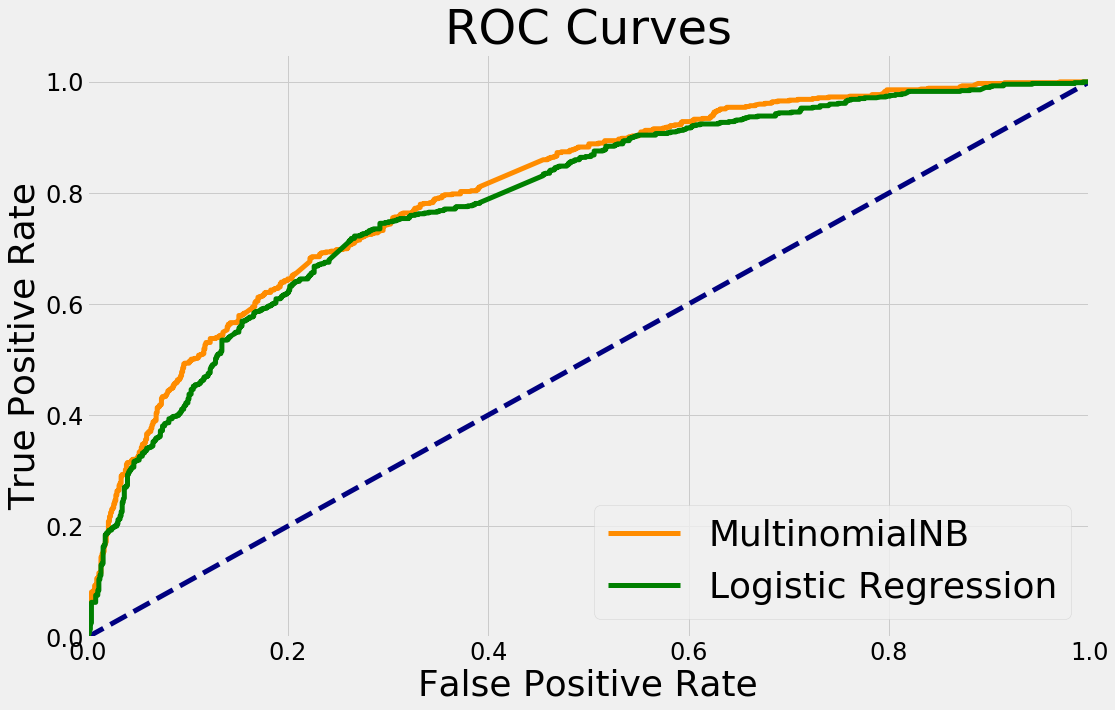

In [660]:
fpr = dict()
tpr = dict()

roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:,1])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_class.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lpr = dict()
ipr = dict()
loc_auc = dict()
for i in range(2):
    lpr[i], ipr[i], _ = roc_curve(y_test, lr_prob[:,1])
    
lpr["micro"], ipr["micro"], _ = roc_curve(y_test.ravel(), y_pred_class.ravel())
loc_auc["micro"] = auc(lpr["micro"], ipr["micro"])

plt.figure(figsize = (16,10))
lw = 5
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='MultinomialNB')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 36)
plt.ylabel('True Positive Rate', fontsize = 36)
plt.title('ROC Curves', fontsize = 48)
plt.plot(lpr[1], ipr[1], color='green',
         lw=lw, label='Logistic Regression')
plt.legend(loc="lower right", fontsize= 36)
plt.show()

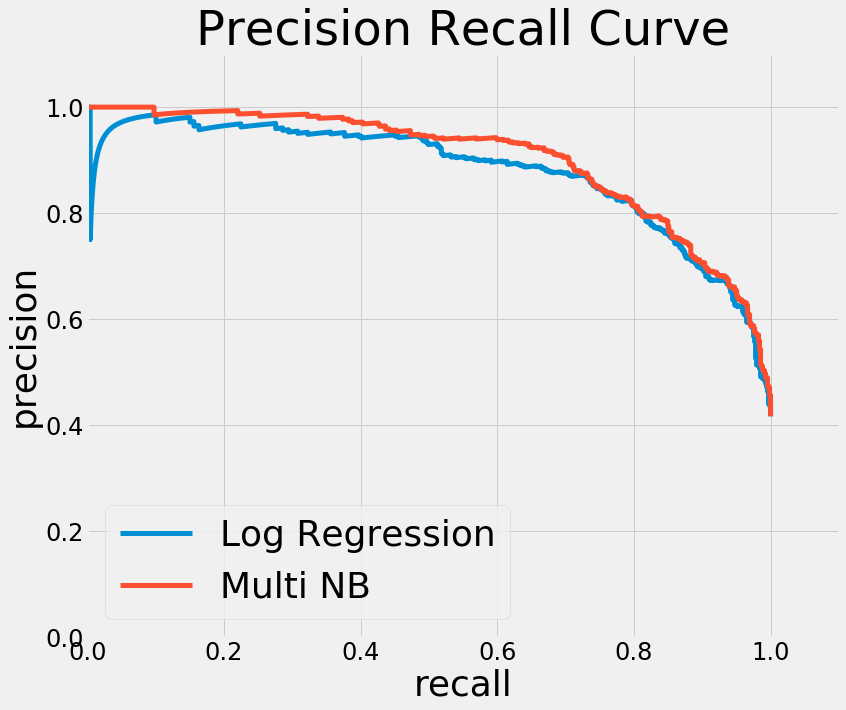

In [408]:
df = calculate_threshold_values(lr_prob[:,1], y_test)
df1 = calculate_threshold_values(y_prob[:,1], y_test)
fig, ax = plt.subplots(figsize = (12, 10))
ax.plot(df.tpr,df.precision, linewidth = 5, label = 'Log Regression')
    #ax.plot([0,1],[0,1], 'k')
ax.set_xlabel('recall', fontsize = 36)
ax.set_ylabel('precision', fontsize = 36)
#ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label = 'random', linewidth = 3)
ax.set_xlim(xmin=0,xmax=1)
ax.set_ylim(ymin=0,ymax=1)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
ax.set_title('Precision Recall Curve', fontsize=48)

ax.plot(df1.tpr,df1.precision, linewidth = 5, label = 'Multi NB')
ax.set_xlim(xmin=0,xmax=1.1)
ax.set_ylim(ymin=0,ymax=1.1)
ax.legend(fontsize = 36)

In [411]:
vector_pd

,000,08,10,100,10th,11,112,118,11th,12,...,young,younger,youngest,youth,youtub,youtube,zero,zip,zone,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
preprocess(all_primaries2['tokenized'])


["My name is Martin O'Malley, former Mayor of Baltimore, former governor of Maryland, a life long democrat, and most importantly, a husband, and a father.",
 'My wife Katie and I have four great kids, Grace, and Tara, and William and Jack.',
 "And, like you, there is nothing we wouldn't do to give them healthier and better lives.",
 'There are some things that I have learned to do better in life than others.',
 'And, after 15 years of executive experience, I have learned how to be an effective leader.',
 'Whether it was raising the minimum wage, making our public schools the best in America, passing marriage equality, the DREAM Act, and comprehensive gun safety legislation, I have learned how to get things done because I am very clear about my principals.',
 'Thanks to President Obama, our country has come a long way since the Wall Street crash of 2008.',
 "Our country's doing better, we are creating jobs again.",
 'But we elected a president, not a magician, and there is urgent work t

In [520]:
second_labels = []
for i, j in enumerate(all_primaries2['tokenized']):
    if 'applaus' in str(j).lower() or 'cheer' in str(j).lower():
            second_labels.append(1)
    else:
        second_labels.append(0)

In [521]:
len(second_labels)

6575

In [512]:
all_primaries2.iloc[2416]

Speaker         sanders
Labels                0
tokenized    [applause]
Name: 2416, dtype: object

In [527]:
all_primaries2['Second Labels'] = second_labels

In [528]:
all_primaries2

,Speaker,Labels,tokenized,Second Labels
0,o'malley,0,"My name is Martin O'Malley, former Mayor of Ba...",0
1,o'malley,0,"My wife Katie and I have four great kids, Grac...",0
2,o'malley,0,"And, like you, there is nothing we wouldn't do...",0
3,o'malley,0,There are some things that I have learned to d...,0
4,o'malley,0,"And, after 15 years of executive experience, I...",0
...,...,...,...,...
6570,sanders,0,Which is why I believe we've got to overturn C...,0
6571,sanders,0,"Is it right that in the greatest, wealthiest c...",0
6572,sanders,0,"If we stand up, fight back, we can do a lot be...",0
6573,sanders,0,That's why I'm running for president.,0


In [565]:
lower = []
for i in all_primaries2['tokenized']:
    lower.append(i.lower())
all_primaries2['tokenized'] = lower

In [567]:
all_primaries2['tokenized'] = all_primaries2['tokenized'].str.findall(r'([a-z]+)')

In [568]:
all_primaries2

,Speaker,Labels,tokenized
0,o'malley,0,"[my, name, is, martin, o, malley, former, mayo..."
1,o'malley,0,"[my, wife, katie, and, i, have, four, great, k..."
2,o'malley,0,"[and, like, you, there, is, nothing, we, would..."
3,o'malley,0,"[there, are, some, things, that, i, have, lear..."
4,o'malley,0,"[and, after, years, of, executive, experience,..."
...,...,...,...
6570,sanders,0,"[which, is, why, i, believe, we, ve, got, to, ..."
6571,sanders,0,"[is, it, right, that, in, the, greatest, wealt..."
6572,sanders,0,"[if, we, stand, up, fight, back, we, can, do, ..."
6573,sanders,0,"[that, s, why, i, m, running, for, president]"


In [650]:
vectorizer = TfidfVectorizer(stop_words='english', max_features = 5000)
ss = SnowballStemmer(language='english')
def preprocess(arr):
    '''
    removes puncuation from array, puts in lower case
    '''
    REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in arr]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in arr]
    return reviews

def stemmer(arr):
    '''
    takes a corpus in an array and returns a simillar arr of stemmed words
    '''
    output = list()
    for text in arr:
        current = ""
        for word in text.split():
            current += ss.stem(word) + " "
        output.append(current)
    return output

def pipeline(arr):
    step1 = preprocess(arr)
    step2 = stemmer(step1)
    step3 = vectorizer.fit_transform(np.array(step2))
    return step3

In [651]:
vector = pipeline(all_primaries2['tokenized'])
vector_pd = pd.DataFrame(vector.toarray(), columns = vectorizer.get_feature_names())

In [611]:
vector_pd

,000,08,10,100,10th,11,112,118,11th,12,...,young,younger,youngest,youth,youtub,youtube,zero,zip,zone,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [647]:
test = pipeline(all_pres2['tokenized'])
test_pd = pd.DataFrame(test.toarray(), columns = vectorizer.get_feature_names())

In [679]:
counts = all_primaries2.groupby('Speaker').count()
counts

,Labels,tokenized
Speaker,,
clinton,2848,2848
o'malley,826,826
sanders,2901,2901


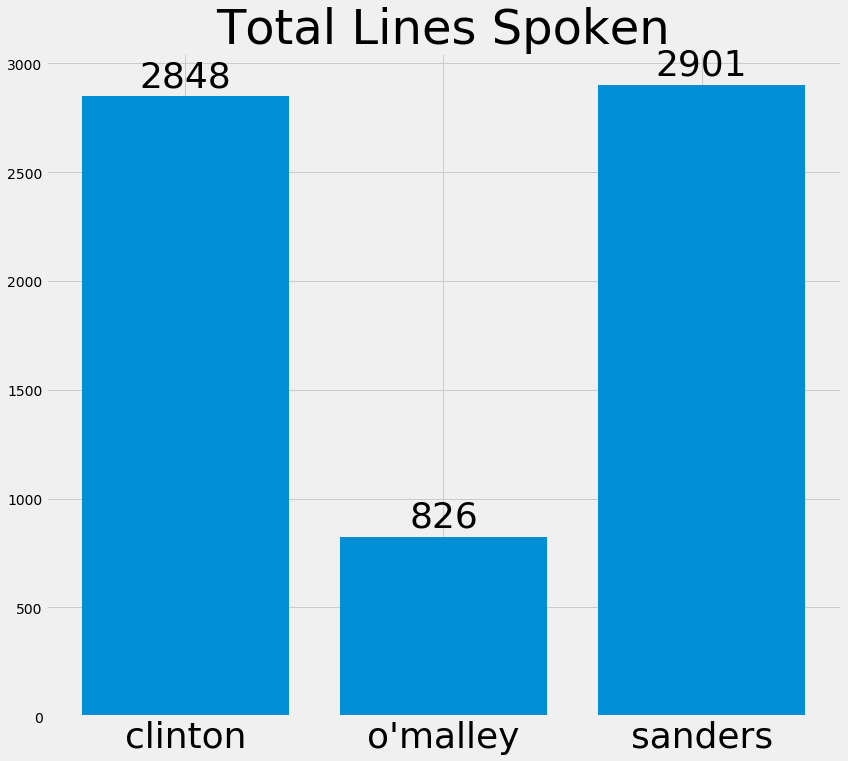

In [702]:
fig, ax = plt.subplots(figsize = (12, 10))
rects1 = ax.bar(x = counts.index, height = counts['tokenized'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 36)
autolabel(rects1)
fig.tight_layout()
plt.xticks(fontsize = 36)
ax.set_title("Total Lines Spoken", fontsize = 48)
plt.show()

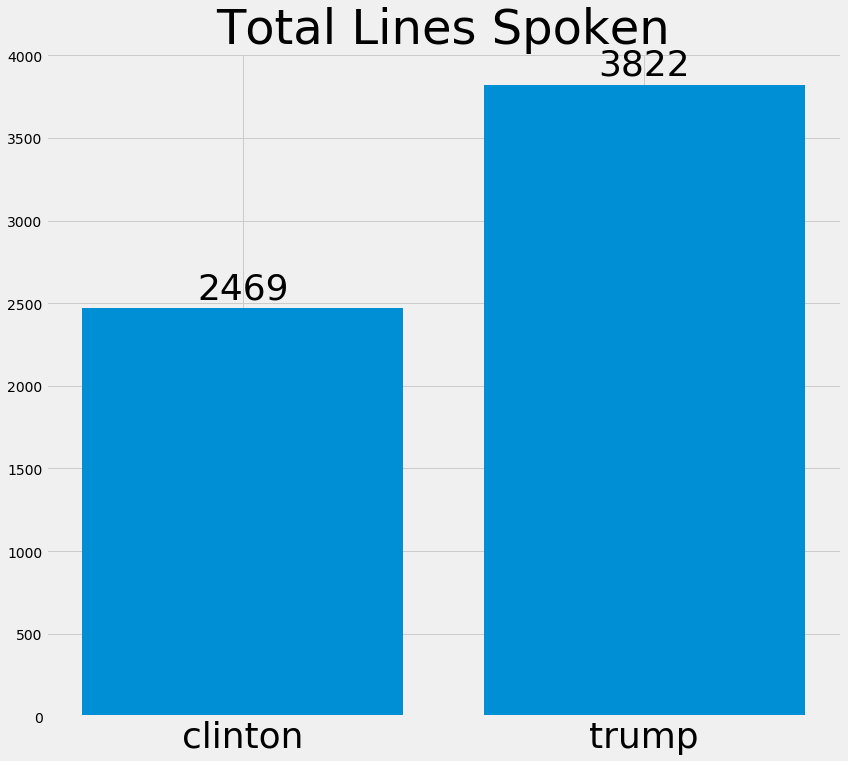

In [703]:
counts = all_pres2.groupby('Speaker').count()

fig, ax = plt.subplots(figsize = (12, 10))
rects1 = ax.bar(x = counts.index, height = counts['tokenized'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 36)
autolabel(rects1)
fig.tight_layout()
plt.xticks(fontsize = 36)
ax.set_title("Total Lines Spoken", fontsize = 48)
plt.show()